# ゼロから作るDeep Learning
### 3.2 ステップ関数の実装

In [1]:
# 3章で使うライブラリをインポートしておく
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

#### 3.2.2 ステップ関数の実装
ステップ関数を3通りの方法で実装している。  

1つ目はデフォルトで用意されているpythonの機能のみを利用して作成しており、for文などのループ処理を利用しなければ複数の入力を計算することはできない。  
2つ目はサードパーティ製ライブラリのnumpyを利用して、複数の数値をpythonのループ処理を使わずに一括処理できるようにしている。  
3つ目は2つ目が持っているバグを修正したものになっている。  

##### 1つ目の定義
-----------------------------------------------------------------------------------------
デフォルトで用意されているpythonの機能のみを利用して作成

In [2]:
def step_function1(x):
    if x > 0:
        return 1
    else:
        return 0

# Test
print('step_function1(0.1) =', step_function1(0.1))
print('step_function1(-1.6) =', step_function1(-1.6))

step_function1(0.1) = 1
step_function1(-1.6) = 0


In [3]:
# これはエラーになる
# もちろん純粋なリストも不可
step_function1(np.array([0.1, -1.6]))

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

##### 2つ目の定義
-----------------------------------------------------------------------------------------------
numpyの配列の機能を利用して定義している。  
y.astype(np.int64)を使うとbool値配列であるyが0または1に変換されるところがミソ。  
しかし、xにスカラー値を入力するとastypeメソッドが使えないため、エラーが起こる。

In [4]:
def step_function2(x):
    y = x > 0

    return y.astype(np.int64)

# Test
# 次の2つは成功
print('step_function2(np.array([0.1, -1.6])) =', step_function2(np.array([0.1, -1.6])))
print('step_function2(np.array(0.1)) =', step_function2(np.array(0.1)))

# これはエラーが発生する
print('step_function2(-1.6) =', step_function2(-1.6))

step_function2(np.array([0.1, -1.6])) = [1 0]
step_function2(np.array(0.1)) = 1


AttributeError: 'bool' object has no attribute 'astype'

##### 3つ目の定義
-------------------------------------------------------------------------
x > 0の部分で評価されたbool値（スカラーまたは配列とも）をnumpyの配列に変換している。  
その過程でbool値を整数に変換しているため、xにスカラー値を入力してもエラーは起こらない。

In [5]:
def step_function(x):

    return np.array(x > 0, dtype=np.int64)

# Test
# 次の2つはもちろん成功
print('step_function(np.array([0.1, -1.6])) =', step_function(np.array([0.1, -1.6])))
print('step_function(np.array(0.1)) =', step_function(np.array(0.1)))

# これも成功する
print('step_function(-1.6) =', step_function(-1.6))

step_function(np.array([0.1, -1.6])) = [1 0]
step_function(np.array(0.1)) = 1
step_function(-1.6) = 0


#### 3.2.3 ステップ関数のグラフ
3つ目の定義(step_function)でグラフを描画してみる。

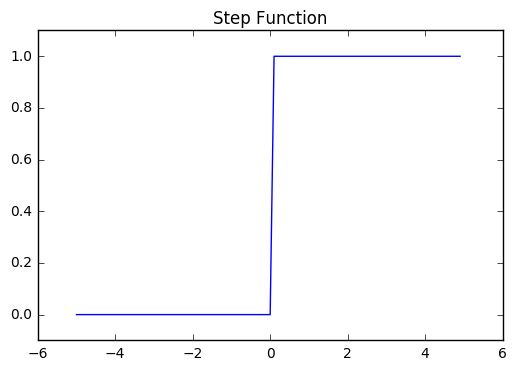

In [6]:
x = np.arange(start=-5, stop=5, step=0.1)
y = step_function(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.title('Step Function')

#### 3.2.4 シグモイド関数の実装
\begin{equation}
h(x) = \frac{1}{1 + \text{exp}(-x)}
\end{equation}
をシグモイド関数(sigmoid function)と呼ぶ。

In [7]:
# シグモイド関数の実装
def sigmoid(x):

    return 1 / (1 + np.exp(-x))

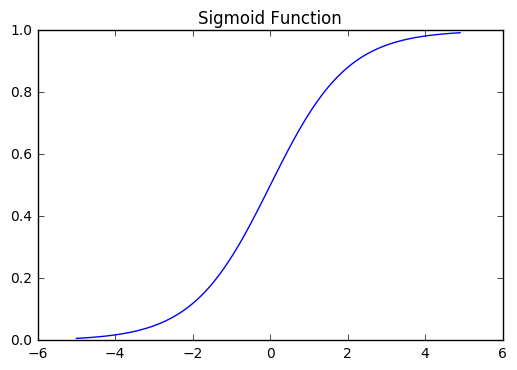

In [9]:
# シグモイド関数を描画する
x = np.arange(start=-5, stop=5, step=0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')

#### 3.2.7 ReLU関数
ニューラルネットワークにおいて、シグモイド関数が活性化関数として使われてきたが、最近はReLU関数(Rectified Linear Unit)にが主に利用されている。  
ReLU関数の定義は次の通り。
\begin{equation}
h(x) = \begin{cases}
        x & (x > 0)   \\
        0 & (x \le 0)
    \end{cases}
\end{equation}
これはmaxを使って次の定義に書き換えられる。
\begin{equation}
h(x) = \max(0, x)
\end{equation}

numpyにはmax関数とmaximum関数があるが、配列同士の大小比較ができるのはmaximumであることに注意する。

In [10]:
# ReLU関数の定義
def relu(x):
    return np.maximum(0, x)

# Test
print('relu(np.array([-1, -0.1, 0.1])) =', relu(np.array([-1, -0.1, 0.1])))
print('relu(-0.1) =', relu(-0.1))
print('relu(0.1) =', relu(0.1))

relu(np.array([-1, -0.1, 0.1])) = [ 0.   0.   0.1]
relu(-0.1) = 0.0
relu(0.1) = 0.1


## 3.4 3層ニューラルネットワークの実装
#### 3.4.2 各層における信号伝達の実装
第1層と第2層の活性化関数にシグモイド関数を、第3層（出力層）の活性化関数に恒等関数を使う。  

In [11]:
# 恒等関数の定義
def identity_function(x):

    return x

#### 3.4.3 実装のまとめ

In [12]:
def init_network():

    network = {}

    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])

    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])

    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network


def forward(network, x):

    W1 = network['W1']
    W2 = network['W2']
    W3 = network['W3']

    b1 = network['b1']
    b2 = network['b2']
    b3 = network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)

    return y


In [13]:
y = forward(
    network=init_network(),
    x=np.array([1.0, 0.5])
) 
print(y)

[ 0.31682708  0.69627909]


## 3.5 出力層の設計
#### 3.5.1 恒等関数とソフトマックス関数
ソフトマックス関数は次式で表される。
\begin{equation}
y_{k} = \frac{\exp(a_{k})}{\sum^{n}_{i=1}\exp(a_{i})}
\end{equation}

In [14]:
# ソフトマックス関数を定義する
def softmax(a):
    exp_a = np.exp(a)
    y = exp_a / np.sum(exp_a)
    
    return y


#### 3.5.2 ソフトマックス関数の実装上の注意
$\exp(x)$の計算は$x$が大きくなるとnanを返すようになるため、上の定義では最終的な計算結果が不安定になる。  
ソフトマックス関数の実装を改善させる。

In [15]:
# 上の定義では3つともnanが帰ってくる
softmax(np.array([1010, 1000, 990]))

/home/ishiyama/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
/home/ishiyama/.pyenv/versions/anaconda3-4.0.0/lib/python3.5/site-packages/ipykernel/__main__.py:4: RuntimeWarning: invalid value encountered in true_divide


array([ nan,  nan,  nan])

In [16]:
# ソフトマックス関数の修正版
def softmax(a):

    c = np.max(a)
    exp_a = np.exp(a - c)
    y = exp_a / sum(exp_a)
    
    return y

In [17]:
# 修正版では3つとも数値が返ってくる
softmax(np.array([1010, 1000, 990]))

array([  9.99954600e-01,   4.53978686e-05,   2.06106005e-09])

## 3.6 手書き数字認識
#### 3.6.1 MNISTデータセット
MNISTは手書き数字の画像セット。  
機械学習分野では最も有名なデータセットの1つであり、簡単な実験から論文として発表される研究まで、様々なシーンで活用される。
MNISTデータセットのダウンロードはmnist.pyを使って行うことにする。
mnist.pyは下記から入手可能。  
https://github.com/oreilly-japan/deep-learning-from-scratch

In [19]:
import sys
import os
from dataset.mnist import load_mnist

# 最初の呼び出しは数分待つとのことだったが、数秒で終わった
# この辺はネット環境の違いによるようだ、、、
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


MNIST画像を表示させてみる。

In [22]:
import sys
import os
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# データをロード
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True)

img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28)
print(img.shape)

# XXX: ちゃんと表示されない
img_show(img)

5
(784,)
(28, 28)


#### 3.6.2 ニューラルネットワークの推論処理

In [29]:
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    
    return x_test, t_test

def init_network():
    with open('deep_learning/deep-learning-from-scratch/ch03/sample_weight.pkl', 'rb') as f:
        network = pickle.load(f)
        
    return network

def predict(network, x):
    
    W1 = network['W1']
    W2 = network['W2']
    W3 = network['W3']

    b1 = network['b1']
    b2 = network['b2']
    b3 = network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

x_list, t_list = get_data()
network = init_network()

accuracy_cnt = 0
for i, (x, t) in enumerate(zip(x_list, t_list)):
    y = predict(network, x)
    p = np.argmax(y)
    if p == t:
        accuracy_cnt += 1

print('Accuracy:', accuracy_cnt / float(len(x_list)))

Accuracy: 0.9352
